In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [70]:
train = pd.read_csv("trainingsetfeatures.csv")
test = pd.read_csv("test data.csv")
target = pd.read_csv("trainingsetlabels.csv")


In [71]:
# saving the ids of the test data in a seperate variable for the model

test_index = test['id'] 

In [72]:
# removing the ids from the dataset because it does not play a significant role in the feature engineering process 

train = train.drop(["id"], axis = 1) 
test = test.drop(["id"], axis = 1) 
target = target.drop(["id"], axis = 1) 

In [73]:
train.shape

(59400, 39)

In [74]:
test.shape

(14850, 39)

In [75]:
train.head(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [76]:
proportion = (target['status_group'].value_counts()/target['status_group'].value_counts().sum())
proportion

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

<p>Here we see that 54.3% of the whole dataset are functional, 38.42% are not functioning and 7.28% are functioning but needs repair

In [77]:
#joining the training and test data
#to avoid double analysis operations

df = train.append(test, ignore_index = True)

In [78]:
df['funder'].dtype

dtype('O')

In [79]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [80]:
# No description is available for num_private variable so we will have to drop this variable.
# Since we have latitudes and longitudes, we will drop the region_codes and district_codes variables

df = df.drop(['num_private', 'region_code', 'district_code'], axis = 1)

In [81]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000
mean,318.685704,665.667313,34.074262,-5.701771e+00,180.750828,1298.463650
std,2906.762364,692.761033,6.572519,2.944969e+00,471.086120,952.349375
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,0.000000
50%,0.000000,364.000000,34.907475,-5.026540e+00,25.000000,1986.000000
75%,20.000000,1317.000000,37.181685,-3.325058e+00,215.000000,2004.000000
max,350000.000000,2777.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


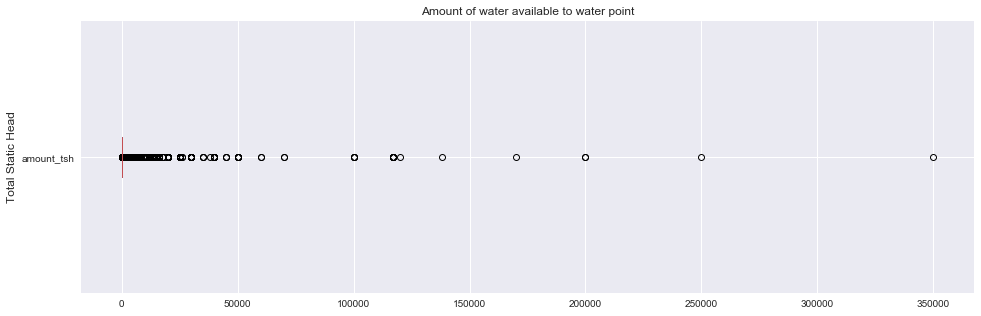

In [82]:
df['amount_tsh'].plot(kind = 'box', vert = False, figsize = (16, 5))
plt.ylabel('Total Static Head', fontsize=12)
plt.title("Amount of water available to water point")
plt.show()


Discover here that amount_tsh contains outlying values

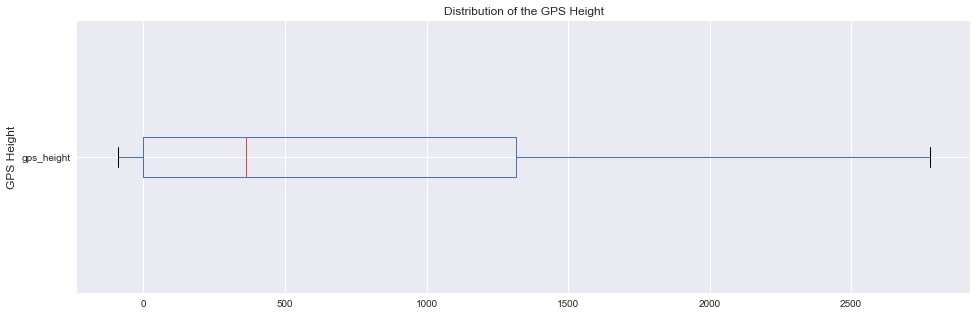

In [83]:
df['gps_height'].plot(kind = 'box', vert = False, figsize = (16, 5))
plt.ylabel('GPS Height', fontsize=12)
plt.title("Distribution of the GPS Height")
plt.show()


The GPS Height is evenly distributed

In [84]:
missing = df.isnull()
for col in missing.columns.values.tolist(): 
    print(f'\n{col}')
    print(f'{missing[col].value_counts()}')


amount_tsh
False    74250
Name: amount_tsh, dtype: int64

date_recorded
False    74250
Name: date_recorded, dtype: int64

funder
False    69746
True      4504
Name: funder, dtype: int64

gps_height
False    74250
Name: gps_height, dtype: int64

installer
False    69718
True      4532
Name: installer, dtype: int64

longitude
False    74250
Name: longitude, dtype: int64

latitude
False    74250
Name: latitude, dtype: int64

wpt_name
False    74250
Name: wpt_name, dtype: int64

basin
False    74250
Name: basin, dtype: int64

subvillage
False    73780
True       470
Name: subvillage, dtype: int64

region
False    74250
Name: region, dtype: int64

lga
False    74250
Name: lga, dtype: int64

ward
False    74250
Name: ward, dtype: int64

population
False    74250
Name: population, dtype: int64

public_meeting
False    70095
True      4155
Name: public_meeting, dtype: int64

recorded_by
False    74250
Name: recorded_by, dtype: int64

scheme_management
False    69404
True      4846
Name: schem

Dealing with numerical missing values

In [85]:
(df['population']==0).value_counts()

False    47416
True     26834
Name: population, dtype: int64

In [86]:
(df['construction_year']==0).value_counts()

False    48281
True     25969
Name: construction_year, dtype: int64

In [87]:
# filling the NaN or 0 values of the population with the average population
pop = df['population']
df['population'] = pop.fillna(df['population'].mean())

Text(0, 0.5, 'Value counts')

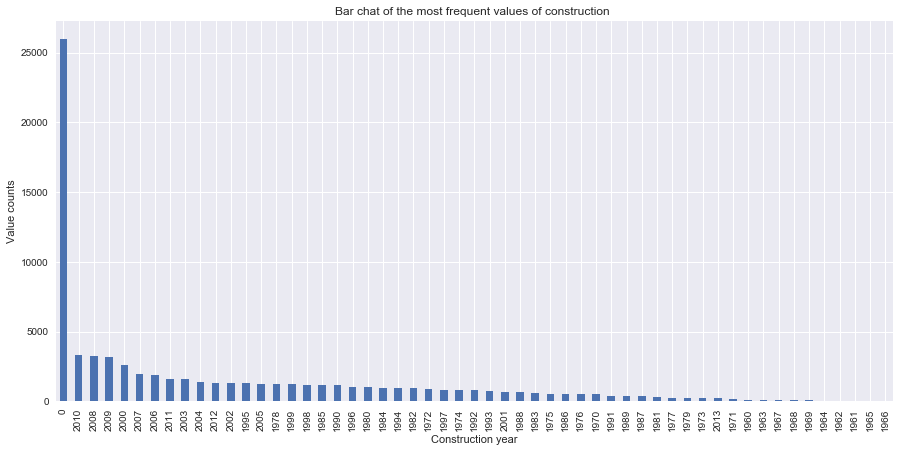

In [88]:
# filling the construction year with the most frequent value
df['construction_year'].value_counts().plot(kind = 'bar', figsize = (15, 7))
plt.title("Bar chat of the most frequent values of construction ")
plt.xlabel('Construction year')
plt.ylabel('Value counts')

Discover here that the most frequent is the NaN i.e 0 values, followed by year 2010. So the most frequent year is 2010 which is the index 1

In [89]:
if df['construction_year'].value_counts().index[0]==0:
    df['construction_year'] = df['construction_year'].fillna(df['construction_year'].value_counts().index[1])
else:
    df['construction_year'] = df['construction_year'].fillna(df['construction_year'].value_counts().index[0])

In [90]:
#dropping some categorical values that are similar to others or seemingly unprofitable to our model
df = df.drop(['date_recorded','funder','wpt_name','region','scheme_name','subvillage','region','lga','ward',
              'public_meeting','extraction_type_group','extraction_type_class', 'recorded_by', 'payment_type','water_quality',
              'quality_group','quantity_group','source_type','source_class','waterpoint_type_group'], axis = 1)

In [91]:
df.head(4)

,amount_tsh,gps_height,installer,longitude,latitude,basin,population,scheme_management,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type
0,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,109,VWC,False,1999,gravity,vwc,user-group,pay annually,enough,spring,communal standpipe
1,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,280,Other,True,2010,gravity,wug,user-group,never pay,insufficient,rainwater harvesting,communal standpipe
2,25.0,686,World vision,37.460664,-3.821329,Pangani,250,VWC,True,2009,gravity,vwc,user-group,pay per bucket,enough,dam,communal standpipe multiple
3,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,58,VWC,True,1986,submersible,vwc,user-group,never pay,dry,machine dbh,communal standpipe multiple


Dealing with the missing values of categorical features

In [92]:
#getting categorical features
numerical = []
for col in df.columns.values:
    if df[col].dtype != 'object':
        numerical.append(col)

df_categorical = df.drop(numerical, axis=1)
df_categorical.head(4)

,installer,basin,scheme_management,permit,extraction_type,management,management_group,payment,quantity,source,waterpoint_type
0,Roman,Lake Nyasa,VWC,False,gravity,vwc,user-group,pay annually,enough,spring,communal standpipe
1,GRUMETI,Lake Victoria,Other,True,gravity,wug,user-group,never pay,insufficient,rainwater harvesting,communal standpipe
2,World vision,Pangani,VWC,True,gravity,vwc,user-group,pay per bucket,enough,dam,communal standpipe multiple
3,UNICEF,Ruvuma / Southern Coast,VWC,True,submersible,vwc,user-group,never pay,dry,machine dbh,communal standpipe multiple


In [93]:
missing_cat = []
for col in df_categorical.columns.values:
    if np.sum(df_categorical[col].isnull())>0:
        value = np.sum(df_categorical[col].isnull())
        print(col, '=====', value)
        missing_cat.append(col)
missing_cat

installer ===== 4532
scheme_management ===== 4846
permit ===== 3793


['installer', 'scheme_management', 'permit']

In [94]:
for item in missing_cat:
    if df[item].value_counts().index[0]==0:
        df[item] = df[item].fillna(df[item].value_counts().index[1])
    else:
        df[item] = df[item].fillna(df[item].value_counts().index[0])

In [95]:
missing = df.isnull()
for col in missing.columns.values.tolist(): 
    print(f'\n{col}')
    print(f'{missing[col].value_counts()}')

print('\n\n <=======>\n No missing values anymore')


amount_tsh
False    74250
Name: amount_tsh, dtype: int64

gps_height
False    74250
Name: gps_height, dtype: int64

installer
False    74250
Name: installer, dtype: int64

longitude
False    74250
Name: longitude, dtype: int64

latitude
False    74250
Name: latitude, dtype: int64

basin
False    74250
Name: basin, dtype: int64

population
False    74250
Name: population, dtype: int64

scheme_management
False    74250
Name: scheme_management, dtype: int64

permit
False    74250
Name: permit, dtype: int64

construction_year
False    74250
Name: construction_year, dtype: int64

extraction_type
False    74250
Name: extraction_type, dtype: int64

management
False    74250
Name: management, dtype: int64

management_group
False    74250
Name: management_group, dtype: int64

payment
False    74250
Name: payment, dtype: int64

quantity
False    74250
Name: quantity, dtype: int64

source
False    74250
Name: source, dtype: int64

waterpoint_type
False    74250
Name: waterpoint_type, dtype: int6

<h5>Spliting back the data to a test/train features.<br> 
The training data was the first 59400 rows<br>
The test data is the remaining rows 14850</h5>

In [96]:
train = df.iloc[:59400,:]
test = df.iloc[59400:,:]

In [97]:
train.head(4)

,amount_tsh,gps_height,installer,longitude,latitude,basin,population,scheme_management,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type
0,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,109,VWC,False,1999,gravity,vwc,user-group,pay annually,enough,spring,communal standpipe
1,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,280,Other,True,2010,gravity,wug,user-group,never pay,insufficient,rainwater harvesting,communal standpipe
2,25.0,686,World vision,37.460664,-3.821329,Pangani,250,VWC,True,2009,gravity,vwc,user-group,pay per bucket,enough,dam,communal standpipe multiple
3,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,58,VWC,True,1986,submersible,vwc,user-group,never pay,dry,machine dbh,communal standpipe multiple


In [98]:
test.head(4)

,amount_tsh,gps_height,installer,longitude,latitude,basin,population,scheme_management,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type
59400,0.0,1996,DMDD,35.290799,-4.059696,Internal,321,Parastatal,True,2012,other,parastatal,parastatal,never pay,seasonal,rainwater harvesting,other
59401,0.0,1569,DWE,36.656709,-3.309214,Pangani,300,VWC,True,2000,gravity,vwc,user-group,never pay,insufficient,spring,communal standpipe
59402,0.0,1567,DWE,34.767863,-5.004344,Internal,500,VWC,True,2010,other,vwc,user-group,never pay,insufficient,rainwater harvesting,other
59403,0.0,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,250,VWC,True,1987,other,vwc,user-group,unknown,dry,shallow well,other


In [99]:
target.head(4)

,status_group
0,functional
1,functional
2,functional
3,non functional


In [100]:
test_index

0        50785
1        51630
2        17168
3        45559
4        49871
         ...  
14845    39307
14846    18990
14847    28749
14848    33492
14849    68707
Name: id, Length: 14850, dtype: int64